In [1]:
import os
import sys
import numpy as np
from scipy.interpolate import griddata
import matplotlib.pyplot as plt
from PIL import Image

In [2]:
img = Image.open('../data/lena.jpg')
img = np.array(img.convert('L'))
img

array([[ 53,  52,  52, ..., 144, 144, 144],
       [ 56,  54,  53, ..., 144, 144, 144],
       [ 58,  56,  54, ..., 144, 144, 144],
       ...,
       [ 41,  39,  37, ...,  31,  32,  32],
       [ 36,  35,  33, ...,  31,  31,  31],
       [ 33,  31,  29, ...,  31,  30,  30]], dtype=uint8)

In [3]:
# A meshgrid of pixel coordinates

nx, ny = img.shape[1], img.shape[0]
X, Y = np.meshgrid(np.arange(0, nx, 1), np.arange(0, ny, 1))
print(X, Y)

[[   0    1    2 ... 1197 1198 1199]
 [   0    1    2 ... 1197 1198 1199]
 [   0    1    2 ... 1197 1198 1199]
 ...
 [   0    1    2 ... 1197 1198 1199]
 [   0    1    2 ... 1197 1198 1199]
 [   0    1    2 ... 1197 1198 1199]] [[  0   0   0 ...   0   0   0]
 [  1   1   1 ...   1   1   1]
 [  2   2   2 ...   2   2   2]
 ...
 [819 819 819 ... 819 819 819]
 [820 820 820 ... 820 820 820]
 [821 821 821 ... 821 821 821]]


In [4]:
def make_interpolated_image(img, nsamples):
    height, width = img.shape[:2]
    ix = np.random.randint(width, size=nsamples)
    iy = np.random.randint(height, size=nsamples)

    samples = img[iy, ix]  # Corrected order for iy and ix

    # Reshape ix and iy to match the shape of samples
    ix_reshaped = ix.reshape((1, nsamples))
    iy_reshaped = iy.reshape((1, nsamples))

    int_img = griddata((iy_reshaped, ix_reshaped), samples, (np.arange(height), np.arange(width)), method='cubic')
    return int_img.astype(np.uint8)  # Convert to uint8

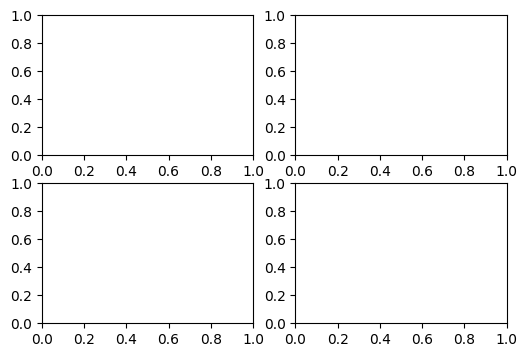

In [5]:
fig, ax = plt.subplots(2, 2, figsize=(6,4), dpi=100)

In [6]:
get_indices = lambda i: (i // nrows, i // ncols)
get_indices

<function __main__.<lambda>(i)>

10000
float64
uint8


/tmp/ipykernel_226447/1580014297.py:17: RuntimeWarning: invalid value encountered in cast
  uint8_array = (int_im).astype(np.uint8)


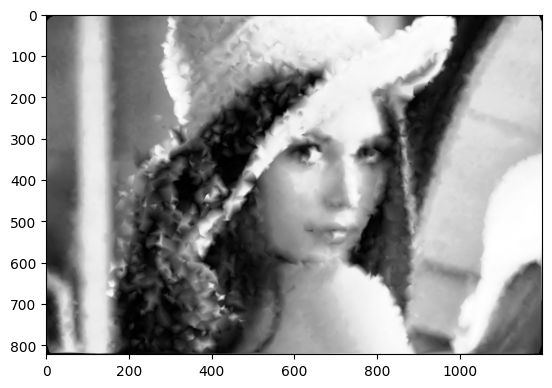

In [7]:
import cv2

i = 2
nrows, ncols = 2, 2
nsamples = 10**(i+2)
print(nsamples)

# generate an array ix containing random integers within the range [0, img.shape]
ix = np.random.randint(img.shape[1], size=nsamples)
iy = np.random.randint(img.shape[0], size=nsamples)

samples = img[iy, ix]
int_im = griddata((iy, ix), samples, (Y, X))

plt.imshow(int_im, cmap=plt.get_cmap('Greys_r'))
print(int_im.dtype)
uint8_array = (int_im).astype(np.uint8)

equ = cv2.equalizeHist(uint8_array)
print(uint8_array.dtype)
plt.imshow(equ, cmap=plt.get_cmap('Greys_r'))


In [1]:
img = Image.open('../data/lena.jpg')
img = np.array(img)

for i in range(4):
    nsamples = 10**(i+2)
    axes = ax[get_indices(i)]
    axes.imshow(make_interpolated_image(img, nsamples), cmap=plt.get_cmap('Greys_r'))
    axes.set_xticks([])
    axes.set_yticks([])
    axes.set_title(f'nsamples = {nsamples}')

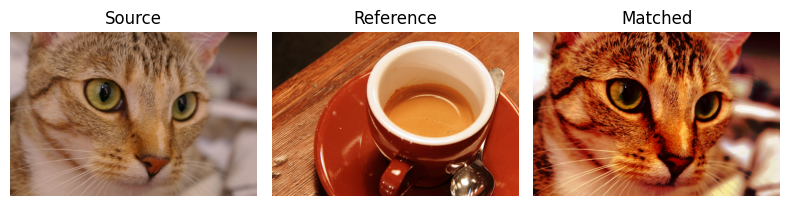

In [2]:
from skimage import data
from skimage import exposure
from skimage.exposure import match_histograms
import matplotlib.pyplot as plt
reference = data.coffee()
image = data.chelsea()

matched = match_histograms(image, reference, channel_axis=-1)

fig, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3, figsize=(8, 3),
                                    sharex=True, sharey=True)
for aa in (ax1, ax2, ax3):
    aa.set_axis_off()

ax1.imshow(image)
ax1.set_title('Source')
ax2.imshow(reference)
ax2.set_title('Reference')
ax3.imshow(matched)
ax3.set_title('Matched')

plt.tight_layout()
plt.show()

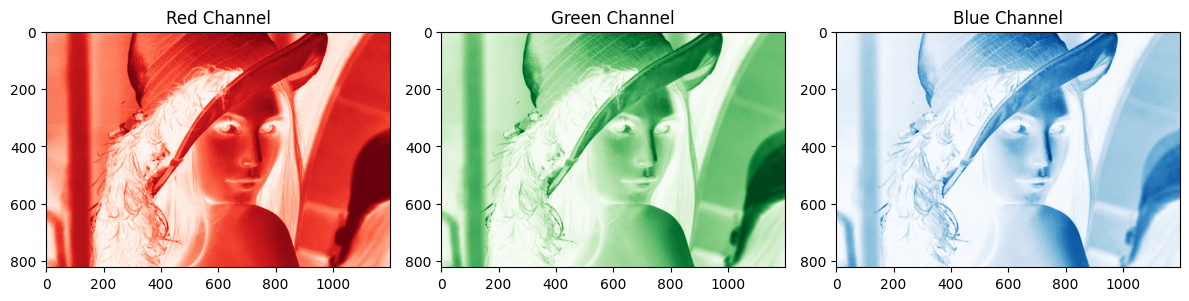

[[ 84  83  84 ... 185 185 185]
 [ 87  85  85 ... 185 185 185]
 [ 89  87  86 ... 185 185 185]
 ...
 [ 54  53  52 ...  49  50  50]
 [ 47  48  47 ...  49  49  49]
 [ 44  42  42 ...  49  48  48]]


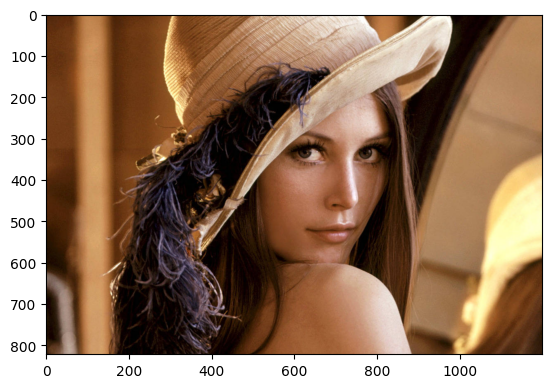

In [3]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

img = Image.open('../data/lena.jpg')

red_channel, green_channel, blue_channel = img.split()

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(12, 4))

ax1.imshow(red_channel, cmap='Reds')
ax1.set_title('Red Channel')

ax2.imshow(green_channel, cmap='Greens')
ax2.set_title('Green Channel')

ax3.imshow(blue_channel, cmap='Blues')
ax3.set_title('Blue Channel')

plt.tight_layout()
plt.show()
print(np.array(red_channel))

channels = (red_channel, green_channel, blue_channel)

rgb_image = Image.merge('RGB', channels)
plt.imshow(rgb_image)

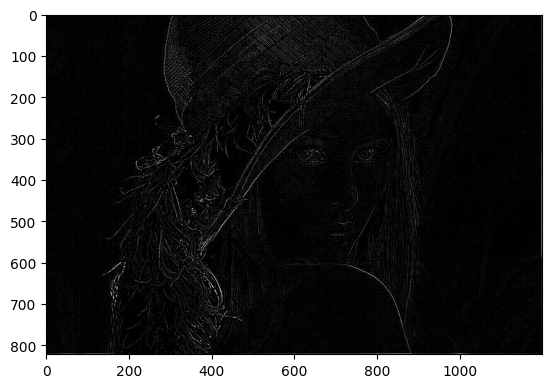

In [7]:
from PIL import Image, ImageFilter

img = Image.open('../data/lena.jpg')

gray_img = img.convert('L')

edge_image = gray_img.filter(ImageFilter.FIND_EDGES)

edge_image_rgb = edge_image.convert('RGB')

plt.imshow(edge_image_rgb, cmap=plt.get_cmap('Greys_r'))

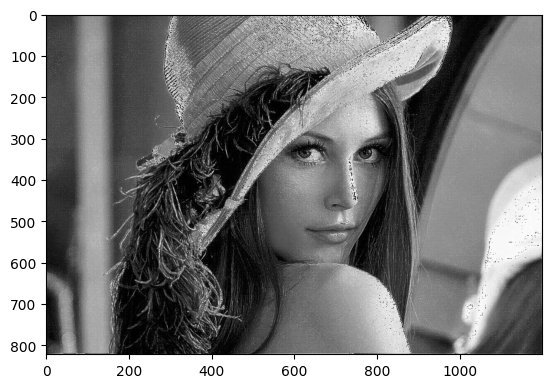

In [8]:
image_out = np.array(edge_image) + gray_img
plt.imshow(image_out, cmap='gray')